# Exercise: Clustering Algorithms with Scikit Learn

<img src="../IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

Hello students! The following is the initial task in the **Generative Computer Vision Models** module

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw datasets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

<Figure size 640x480 with 0 Axes>

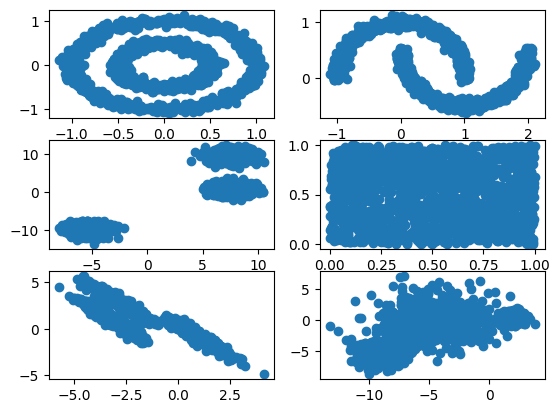

In [3]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2)

axes[0][0].scatter(A[:,0],A[:,1])
axes[0][1].scatter(B[:,0],B[:,1])
axes[1][0].scatter(C[:,0],C[:,1])
axes[1][1].scatter(D[:,0],D[:,1])
axes[2][0].scatter(E[:,0],E[:,1])
axes[2][1].scatter(F[:,0],F[:,1])

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 Plot all results
* 2.2 Manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 
* 2.4 Learn the optimal value of $k$ using the elbow method 

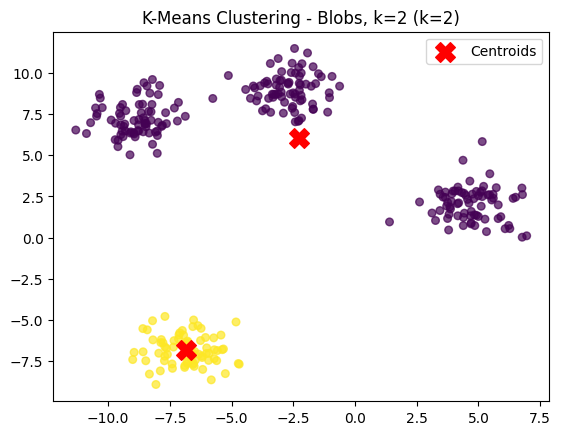

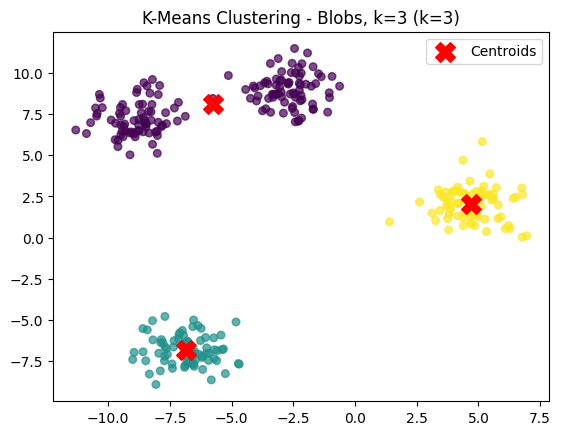

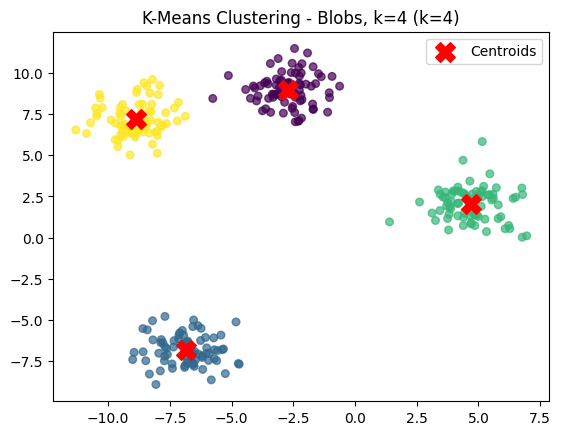

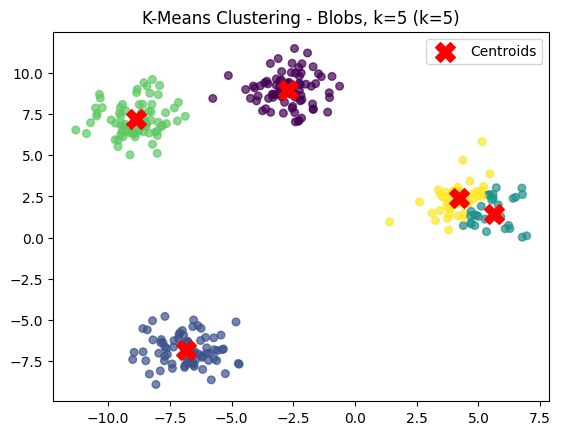

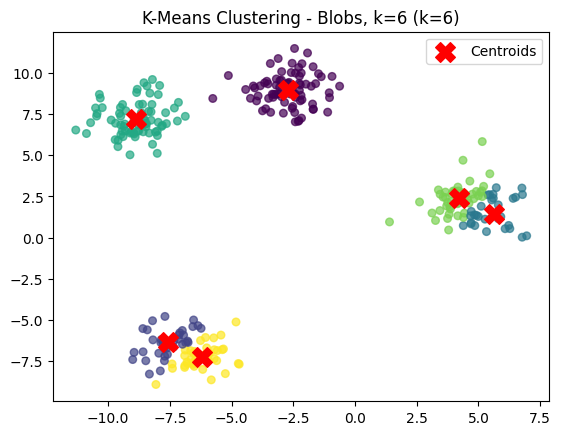

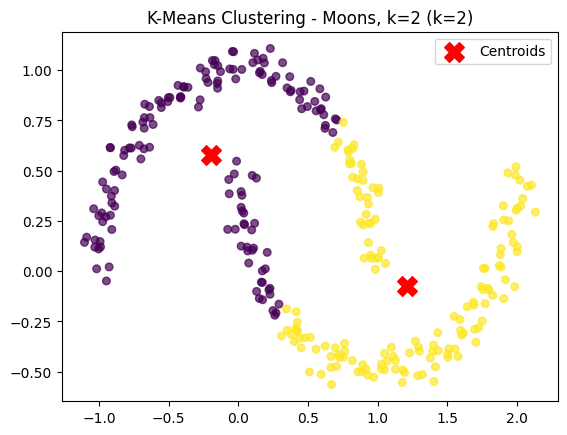

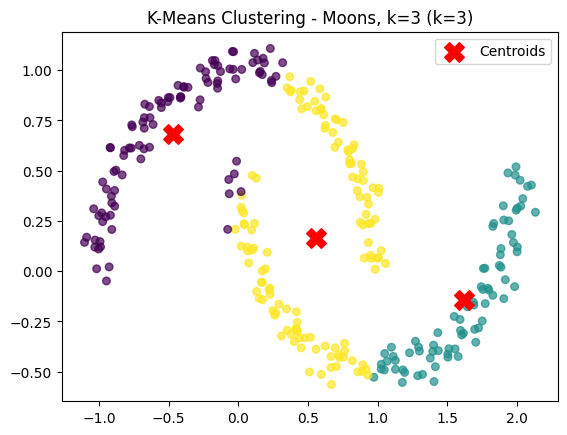

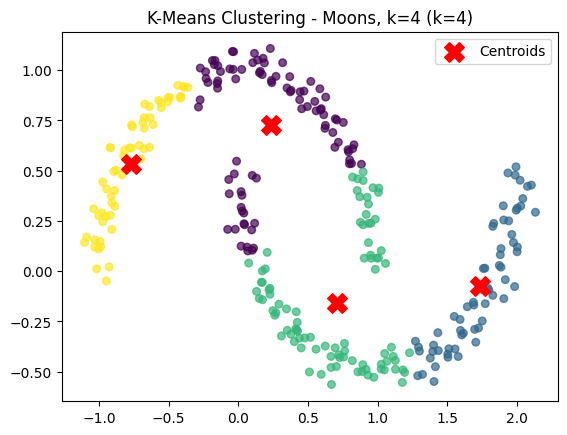

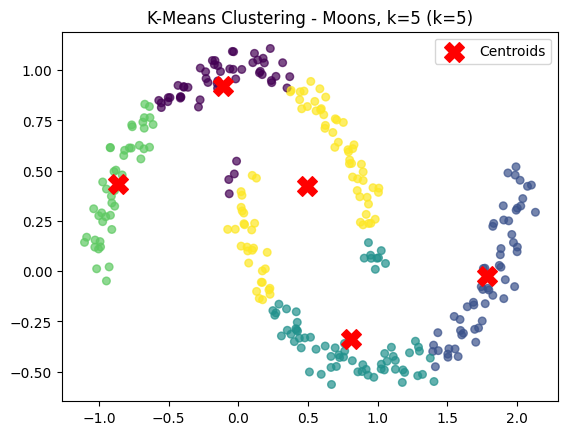

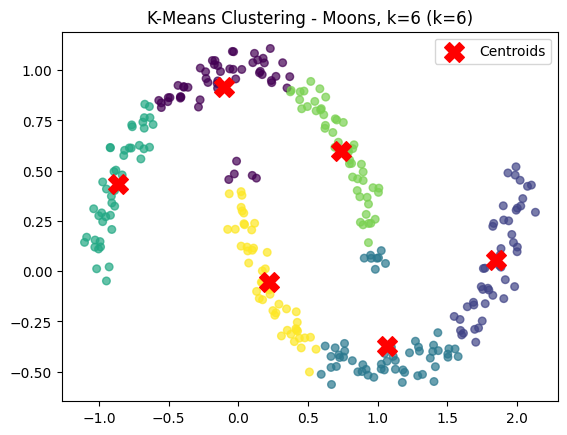

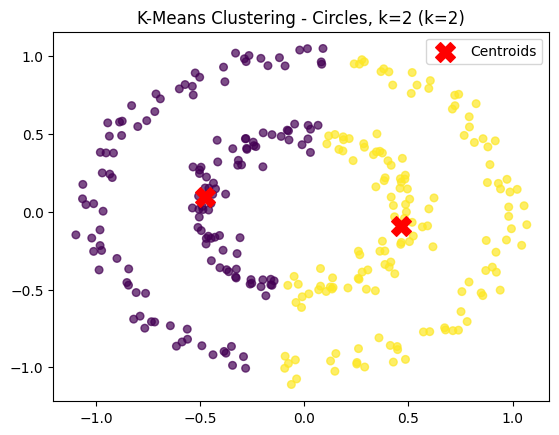

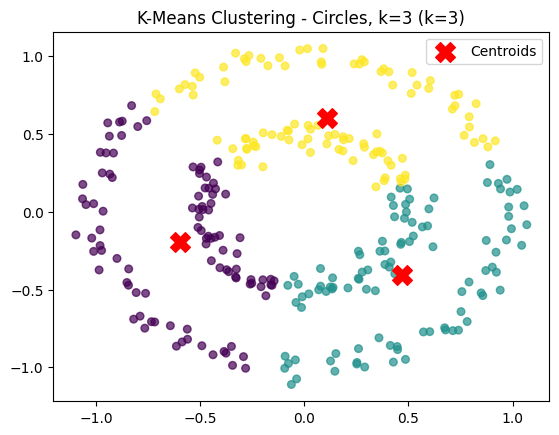

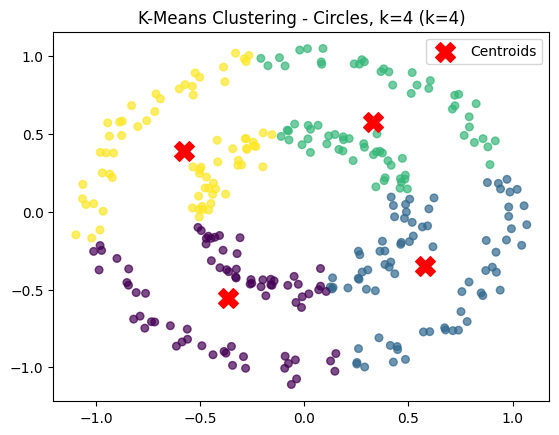

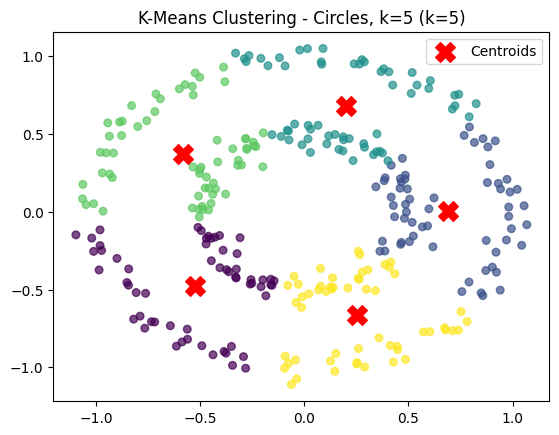

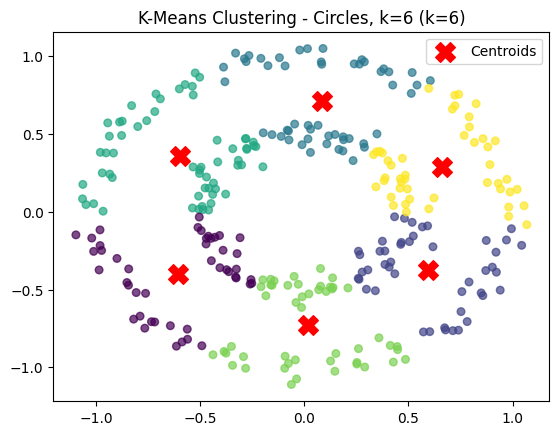

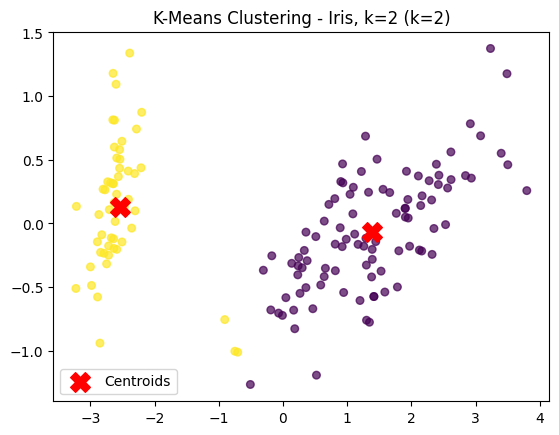

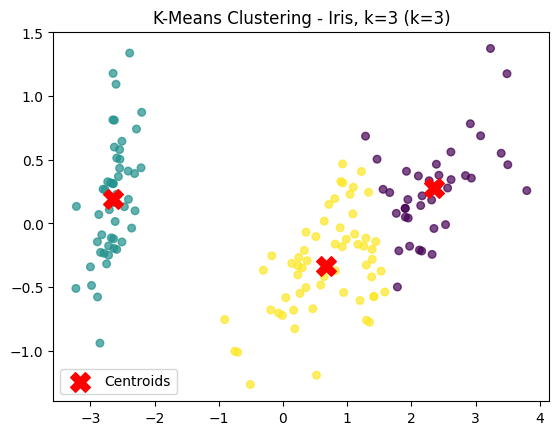

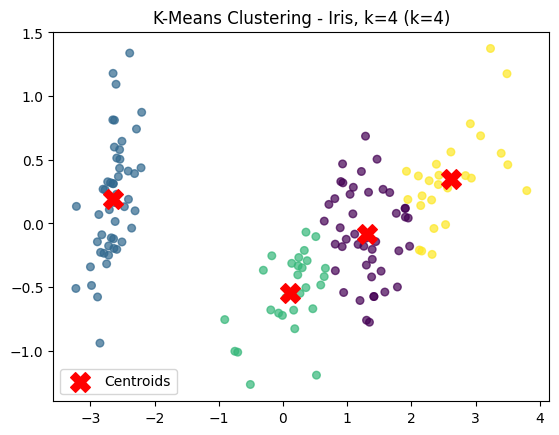

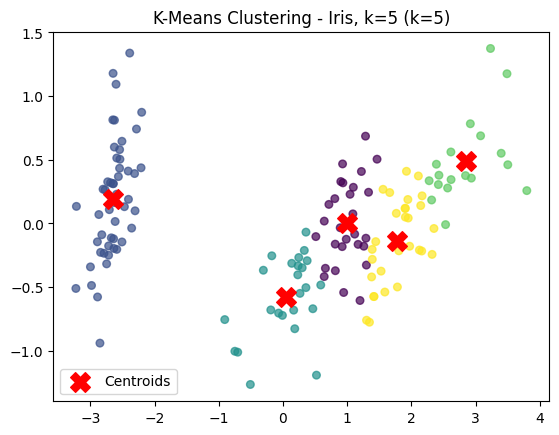

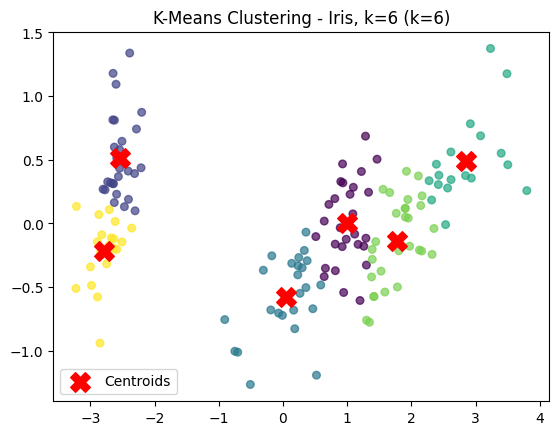

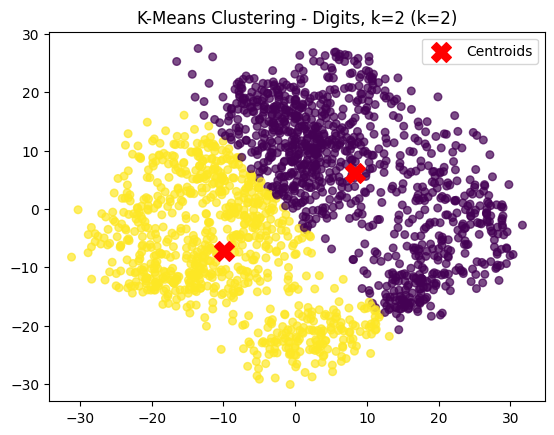

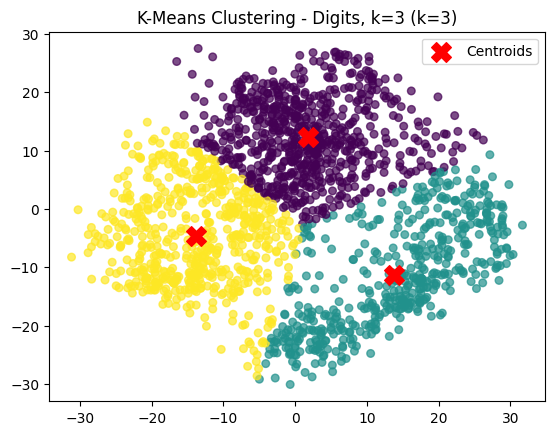

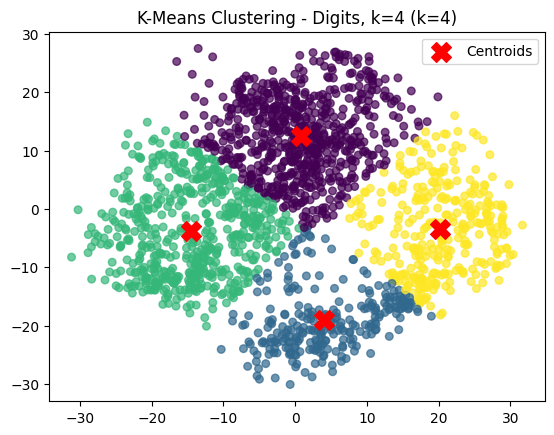

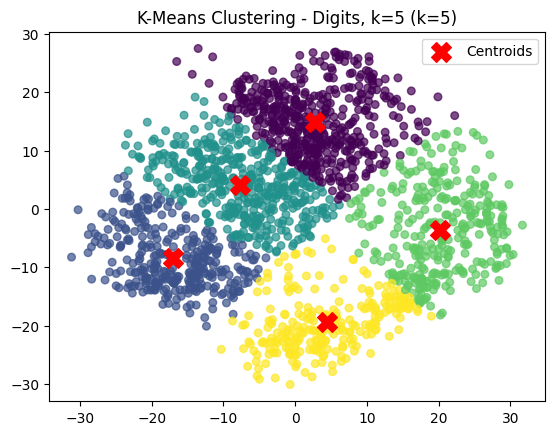

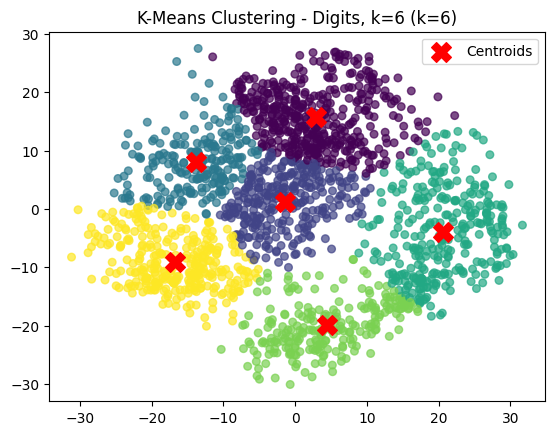

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_digits
from sklearn.decomposition import PCA

# Load datasets from scikit-learn
datasets = {
    "Blobs": make_blobs(n_samples=300, centers=4, random_state=42),
    "Moons": make_moons(n_samples=300, noise=0.05, random_state=42),
    "Circles": make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42),
    "Iris": load_iris(return_X_y=True),
    "Digits": load_digits(return_X_y=True)
}

def plot_kmeans(X, n_clusters, title):
    """Performs KMeans clustering and plots results"""
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    y_pred = kmeans.fit_predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                c='red', marker='X', s=200, label='Centroids')
    
    plt.title(f"{title} (k={n_clusters})")
    plt.legend()
    plt.show()

# Run K-Means clustering and plot results for each dataset
for name, (X, y) in datasets.items():
    if X.shape[1] > 2:
        X = PCA(n_components=2).fit_transform(X)

    for k in range(2, 7):  # Try different k values for manual evaluation
        plot_kmeans(X, n_clusters=k, title=f"K-Means Clustering - {name}, k={k}")


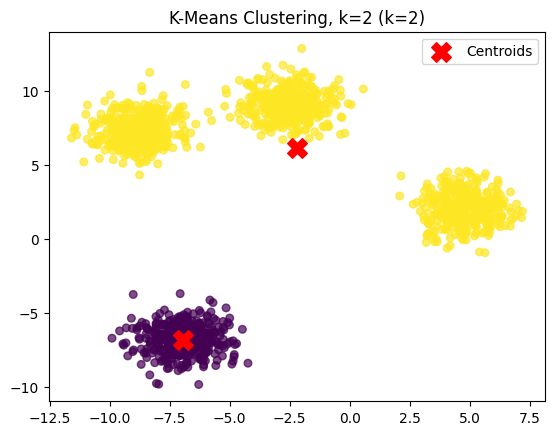

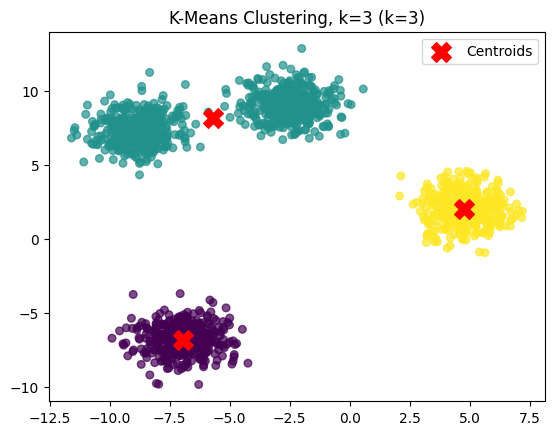

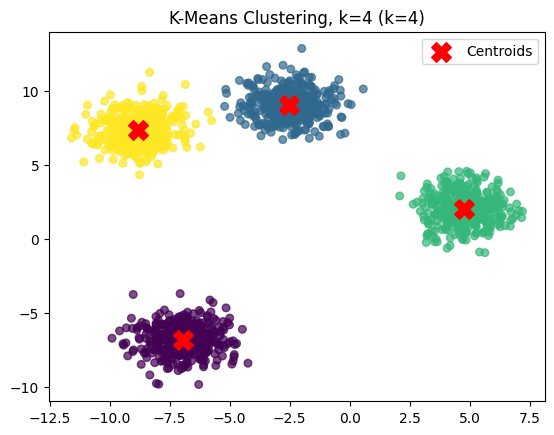

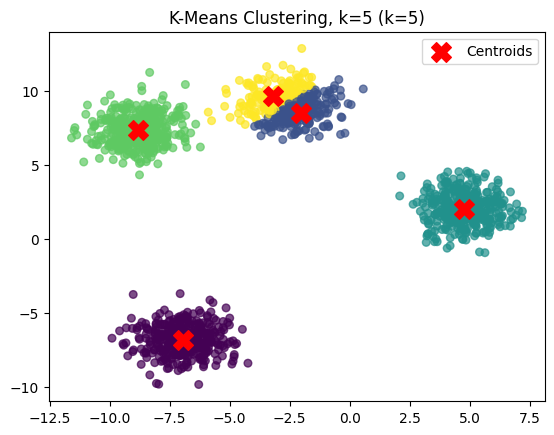

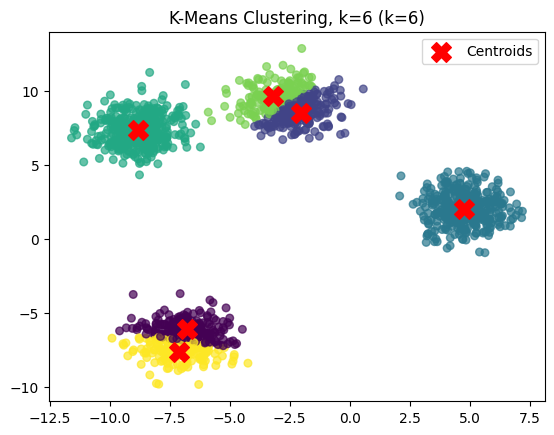

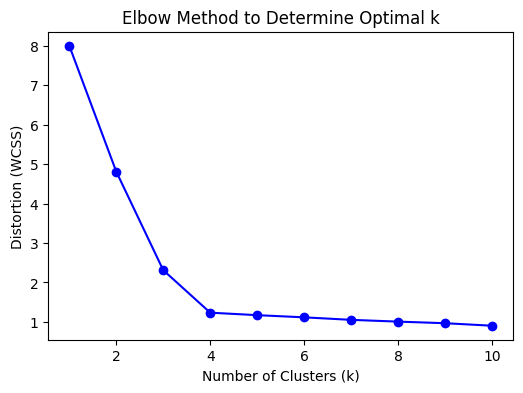

In [5]:
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
# Load dataset
X, y = make_blobs(n_samples=1500, centers=4, random_state=42)

# Function to plot K-Means results
def plot_kmeans(X, n_clusters, title):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    y_pred = kmeans.fit_predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                c='red', marker='X', s=200, label='Centroids')
    
    plt.title(f"{title} (k={n_clusters})")
    plt.legend()
    plt.show()

# ** Plot K-Means for different k values**
for k in range(2, 7):  
    plot_kmeans(X, n_clusters=k, title=f"K-Means Clustering, k={k}")

# ** Find optimal k using the Elbow method**
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot Elbow method
plt.figure(figsize=(6,4))
plt.plot(K_range, distortions, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion (WCSS)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

## Exercise 3
Perform ```DBSCAN``` clustering on any of the data sets: https://scikit-learn.org/stable/modules/clustering.html#dbscan
* 3.1 Plot the results

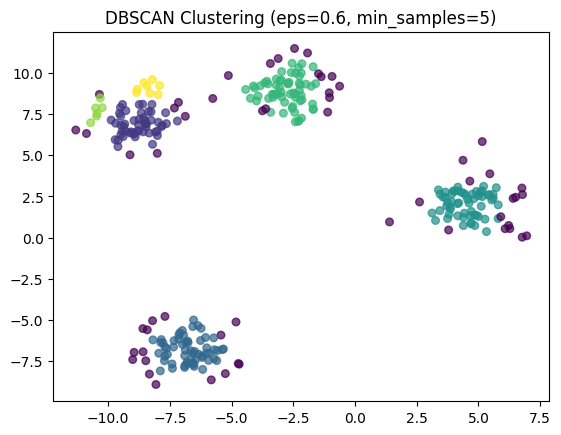

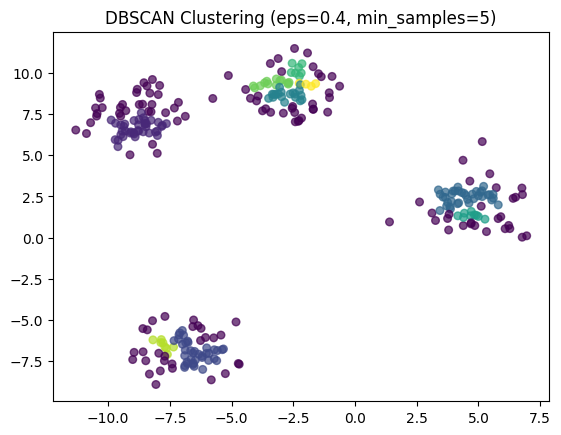

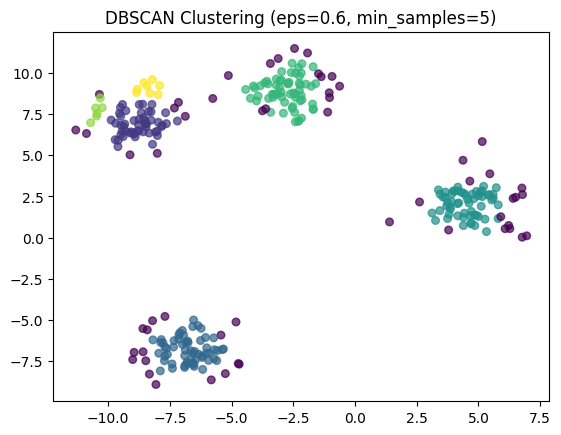

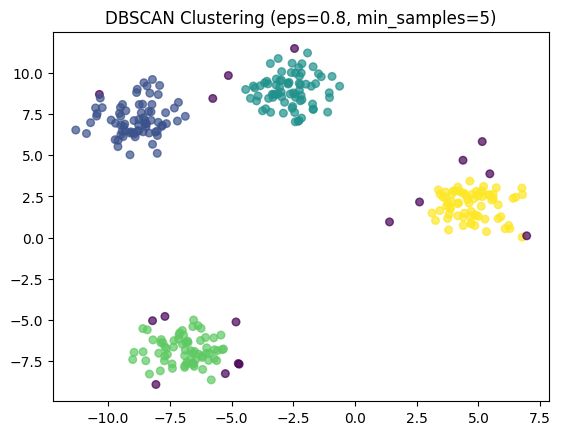

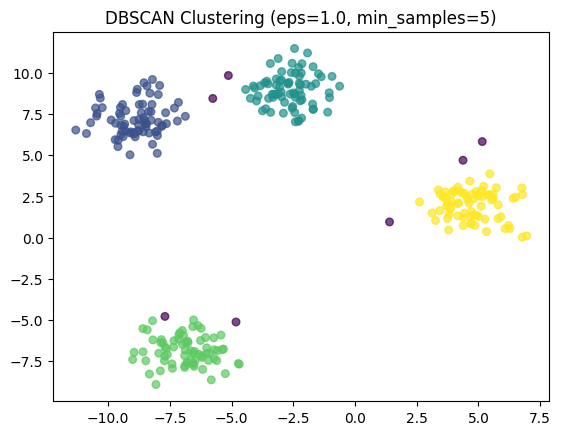

In [6]:
#Load any dataset
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Function to plot clustering results
def plot_clustering(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.7)
    plt.title(title)
    plt.show()

# ** Perform DBSCAN clustering with adjusted parameters**
# DBSCAN: The best 'eps' value depends on the scale of the data and expected density of clusters.
# Here, try eps=0.5 and min_samples=5, adjust if needed based on the dataset.

dbscan = DBSCAN(eps=0.6, min_samples=5)  # Tweaking eps for better separation
dbscan_labels = dbscan.fit_predict(X)

plot_clustering(X, dbscan_labels, f"DBSCAN Clustering (eps=0.6, min_samples=5)")

# **2️⃣ Adjust DBSCAN parameters further:**
# Try different eps values, plot results to see how DBSCAN performs with various eps values.
for eps in [0.4, 0.6, 0.8, 1.0]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)
    plot_clustering(X, dbscan_labels, f"DBSCAN Clustering (eps={eps}, min_samples=5)")

## Exercise 4
Compare the results of both above clustering methods by the mean ```Silhouette Coefficient``` for each data set.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

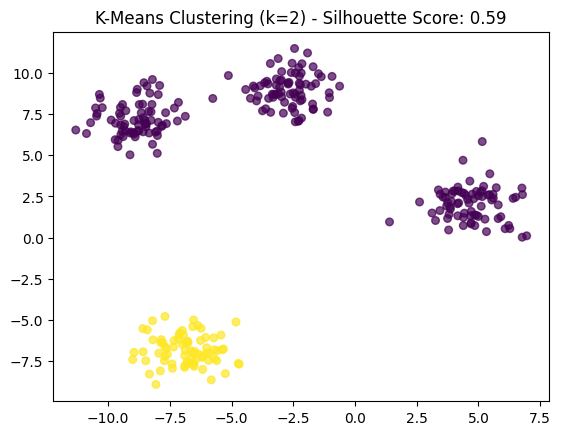

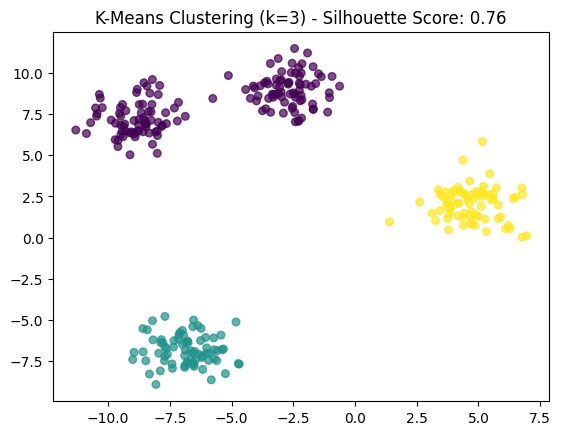

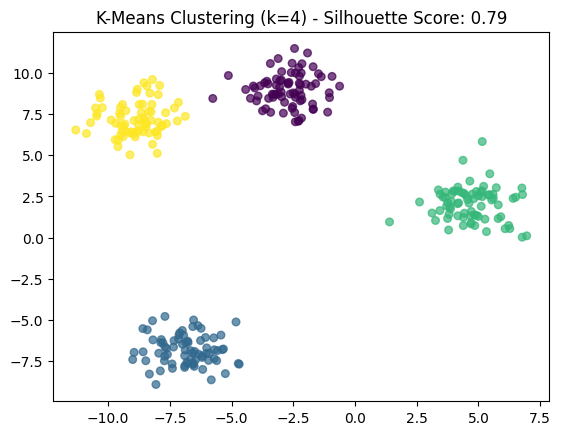

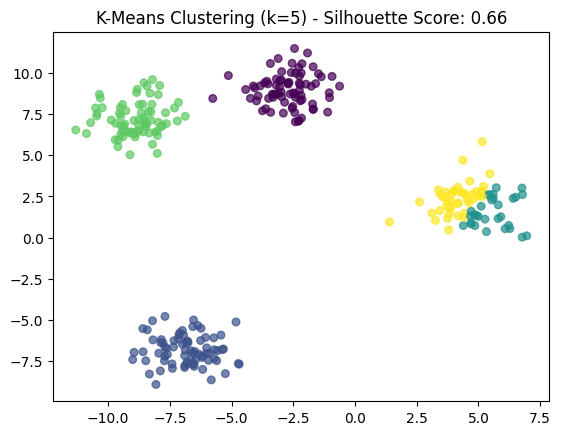

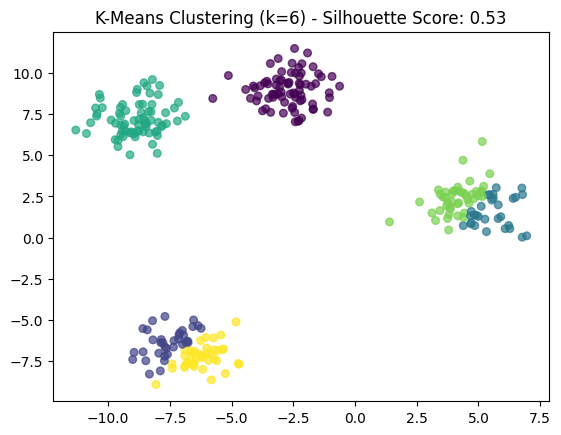

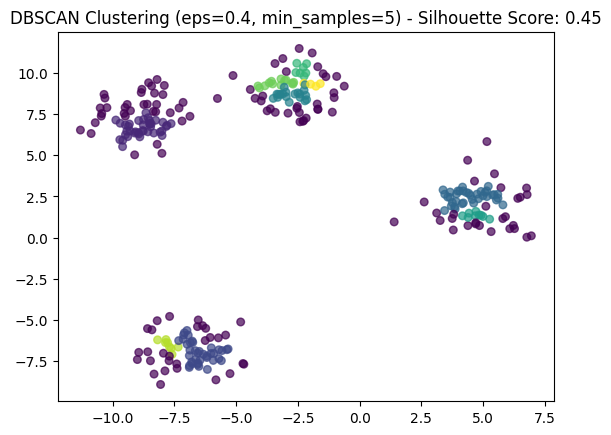

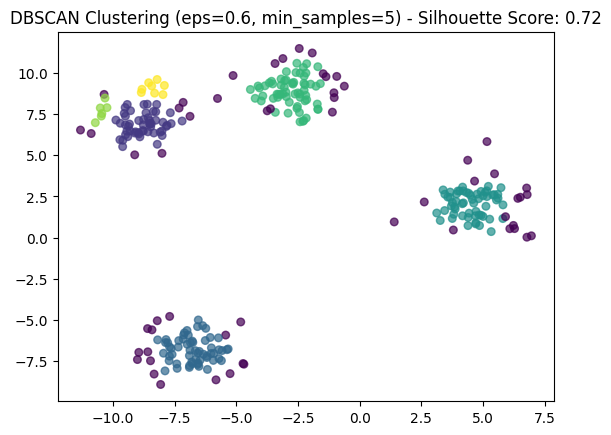

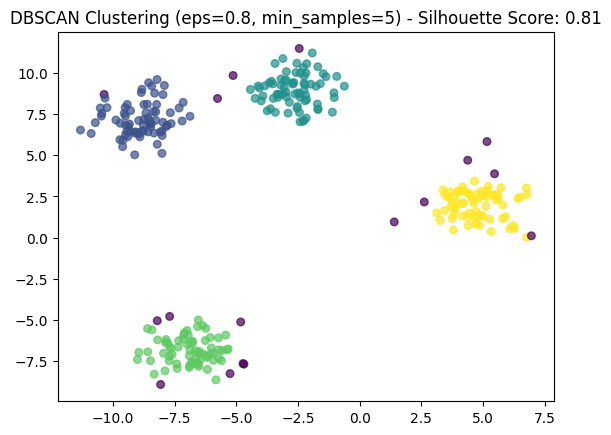

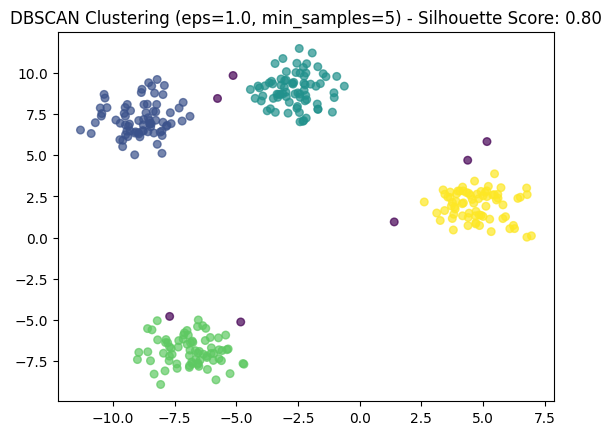

Silhouette Scores for K-Means:
k=2: 0.59
k=3: 0.76
k=4: 0.79
k=5: 0.66
k=6: 0.53

Silhouette Score for DBSCAN: 0.80
DBSCAN:0.45
DBSCAN:0.72
DBSCAN:0.81
DBSCAN:0.80


In [7]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Function to plot clustering results
def plot_clustering(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.7)
    plt.title(title)
    plt.show()
    
silhouette_scores_kmeans = []
silhouette_scores_dbscan = []
# **K-Means Clustering**
for k in range(2, 7):  # Try different k values
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_pred = kmeans.fit_predict(X)
    score = silhouette_score(X, y_pred)
    silhouette_scores_kmeans.append(score)
    plot_clustering(X, y_pred, f"K-Means Clustering (k={k}) - Silhouette Score: {score:.2f}")

# **DBSCAN Clustering**
for eps in [0.4, 0.6, 0.8, 1.0]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X)

    # DBSCAN may assign noise points (-1), so exclude them for silhouette calculation
    dbscan_labels_cleaned = dbscan_labels[dbscan_labels != -1]
    X_cleaned = X[dbscan_labels != -1]
    dbscan_score = silhouette_score(X_cleaned, dbscan_labels_cleaned)
    silhouette_scores_dbscan.append(dbscan_score)
    plot_clustering(X, dbscan_labels, f"DBSCAN Clustering (eps={eps}, min_samples=5) - Silhouette Score: {dbscan_score:.2f}")

# **3️⃣ Compare Silhouette Scores**
print("Silhouette Scores for K-Means:")
for k, score in zip(range(2, 7), silhouette_scores_kmeans):
    print(f"k={k}: {score:.2f}")

print(f"\nSilhouette Score for DBSCAN: {dbscan_score:.2f}")
for k, score in zip(range(len([0.4, 0.6, 0.8, 1.0])), silhouette_scores_dbscan):
    print(f"DBSCAN:{score:.2f}")


## Optional Task
Perform ```SpectralClustering``` clustering on any data sets:https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering
* Plot the results